# Problem 3 Task 5: K-means for compression

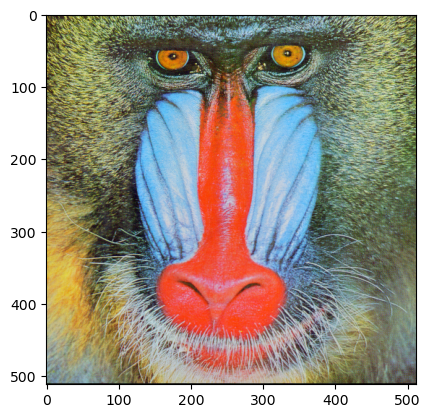

In [13]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

large_A = imread('mandrill-large.tiff')

plt.imshow(large_A)
plt.show()


In [14]:
small_A = imread('mandrill-small.tiff')

In [15]:
print(small_A[3, 13])

[135 151  86]


/var/folders/0n/36gg_gw54h5cjl8_grwsrp400000gn/T/ipykernel_83704/2937121180.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  return (lhs_vec[0] - rhs_vec[0])**2 + (lhs_vec[1] - rhs_vec[1])**2 + (lhs_vec[2] - rhs_vec[2])**2


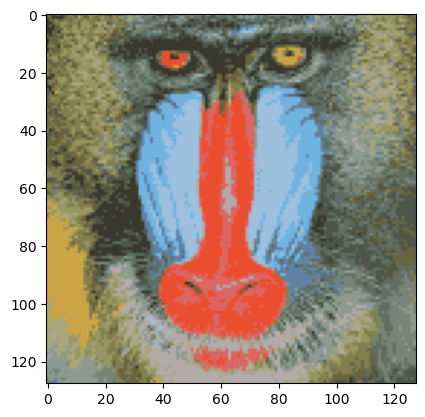

In [17]:
def color_dist(lhs_vec, rhs_vec) -> float:
    return (lhs_vec[0] - rhs_vec[0])**2 + (lhs_vec[1] - rhs_vec[1])**2 + (lhs_vec[2] - rhs_vec[2])**2

def kmeans(A, k=16, iterations=30):
    row, col, _ = A.shape
    clusters = []

    # Randomly choose k pixels for initial clusters
    for i in range(k):
        rand_row = np.random.randint(0, row)
        rand_col = np.random.randint(0, col)
        clusters.append(A[rand_row, rand_col])

    for iter in range(iterations):
        # Step 1:
        cluster_indices = []
        for pixel_row in range(row):
            cluster_indices_row = []
            for pixel_col in range(col):
                distances = [color_dist(A[pixel_row, pixel_col], cluster) for cluster in clusters]
                min_distance_index = np.argmin(distances)
                cluster_indices_row.append(min_distance_index)
            cluster_indices.append(cluster_indices_row)
        cluster_indices = np.array(cluster_indices)

        # Step 2:
        new_clusters = []
        for i in range(k):
            mask = (cluster_indices == i)
            if np.sum(mask) > 0:
                cluster_pixels = A[mask]
                average_color = np.mean(cluster_pixels, axis=0)
                new_clusters.append(average_color)
            else:
                new_clusters.append(clusters[i])
        clusters = new_clusters

    return clusters, cluster_indices

# Load the smaller image
A_small = imread('mandrill-small.tiff')

# Perform K-means manually
final_clusters, cluster_indices = kmeans(A_small)

# Replace each pixel with the nearest cluster centroid
clustered_pixels = np.array(final_clusters)[cluster_indices]
compressed_image = clustered_pixels.astype(np.uint8)

# Display the compressed image
plt.imshow(compressed_image)
plt.show()
    

/var/folders/0n/36gg_gw54h5cjl8_grwsrp400000gn/T/ipykernel_83704/2937121180.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  return (lhs_vec[0] - rhs_vec[0])**2 + (lhs_vec[1] - rhs_vec[1])**2 + (lhs_vec[2] - rhs_vec[2])**2


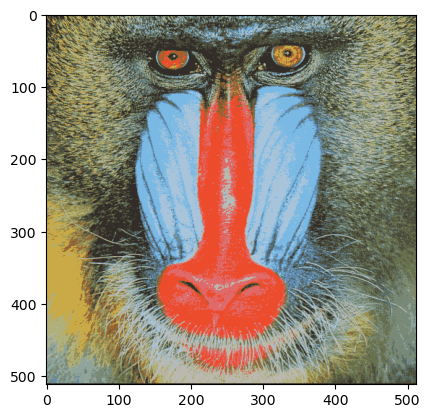

In [18]:
final_clusters, cluster_indices = kmeans(large_A)

# Replace each pixel with the nearest cluster centroid
clustered_pixels = np.array(final_clusters)[cluster_indices]
compressed_image = clustered_pixels.astype(np.uint8)

# Display the compressed image
plt.imshow(compressed_image)
plt.show()